https://www.kaggle.com/c/ieee-fraud-detection/data

In [ ]:
%%capture false
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# If link does not work, get the updated link and change next two lines, and one in next cell.
!wget -q http://mirrors.estointernet.in/apache/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz
!tar xf spark-2.4.3-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install -q pyspark
!pip install pyarrow==0.13.*

## Start

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('figure', figsize=(20.0, 6.0))

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.3-bin-hadoop2.7"

from google.colab import drive
drive.mount('/content/drive')

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
print("spark is ready now!")


spark.conf.set("spark.sql.execution.arrow.enabled", "true")
from pyspark.sql import functions as F

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
spark is ready now!


In [ ]:
train_transaction_og = spark.read.csv("drive/My Drive/PyColab Work/Kaggle Fraud Detection/train_transaction.csv", header=True, inferSchema=True)
train_identity_og = spark.read.csv("drive/My Drive/PyColab Work/Kaggle Fraud Detection/train_identity.csv", header=True, inferSchema=True)

test_transaction_og = spark.read.csv("drive/My Drive/PyColab Work/Kaggle Fraud Detection/test_transaction.csv", header=True, inferSchema=True)
test_identity_og = spark.read.csv("drive//My Drive/PyColab Work/Kaggle Fraud Detection/test_identity.csv", header=True, inferSchema=True)

In [ ]:
train_transaction_og = train_transaction_og.withColumn("TransactionDT", F.from_unixtime("TransactionDT"))
test_transaction_og = test_transaction_og.withColumn("TransactionDT", F.from_unixtime("TransactionDT"))

In [ ]:
train_transaction_og.show(5)

+-------------+-------+-------------------+--------------+---------+-----+-----+-----+----------+-----+------+-----+-----+-----+-----+-------------+-------------+---+---+---+---+---+---+---+---+---+---+---+---+----+---+-----+-----+----+----+----+----+----+----+----+----+-----+----+----+----+-----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+---+----+----+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+------+-----+----+-----+-----

In [ ]:
test_transaction_og.show(5)

+-------------+-------------------+--------------+---------+-----+-----+-----+----------+-----+-----+-----+-----+------+-----+-------------+-------------+---+---+---+---+---+---+---+---+---+---+---+---+-----+---+-----+-----+----+-----+----+----+----+----+----+-----+-----+----+----+----+-----+---+---+---+----+----+---+----+----+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+----+----+----+----+-----+----+-

## EDA

In [ ]:
train_transaction_og.groupBy("isFraud").agg((F.count("isFraud") / train_transaction_og.count() *100).alias("Perc") ).show()

+-------+------------------+
|isFraud|              Perc|
+-------+------------------+
|      1|3.4990009144173126|
|      0| 96.50099908558268|
+-------+------------------+



Train Transaction has 5,90,540 records and 394 columns.  
Train Identity has 1,44,233 and 41 columns.  

Of the total records, 20,663 (3.50%) are fraud and 569877 (96.50%) are geneuine.

Test Transaction has 5,06,691 records and 393 columns.  
Test Identity has 1,41,907 and 41 columns.  


#### ProductCD

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


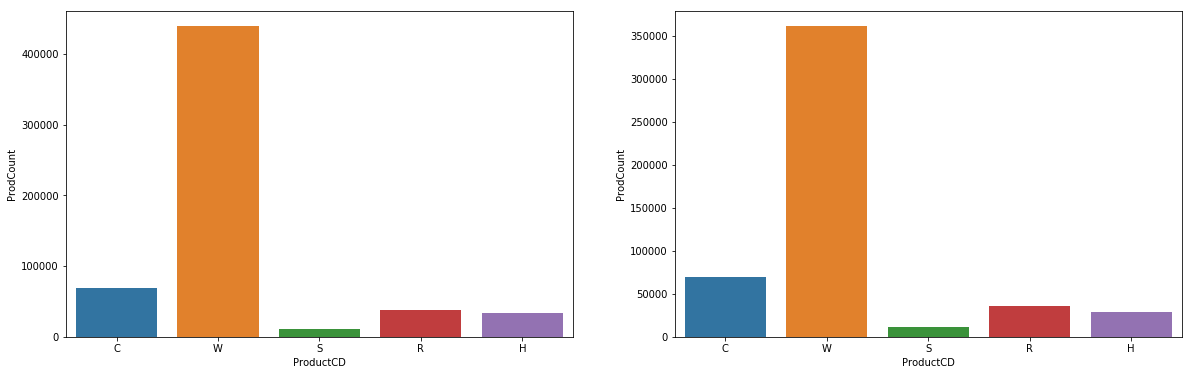

In [ ]:
plt.subplot(1,2,1)
ProductCDTrain = train_transaction_og.groupBy("ProductCD").agg(F.count("ProductCD").alias("ProdCount")).toPandas()
sns.barplot("ProductCD", "ProdCount", data = ProductCDTrain)

plt.subplot(1,2,2)
ProductCDTest = test_transaction_og.groupBy("ProductCD").agg(F.count("ProductCD").alias("ProdCount")).toPandas()
sns.barplot("ProductCD", "ProdCount", data = ProductCDTest)

#### Cards 1 to 6

In [ ]:
# plt.subplot(1,2,1)
# cardTrain = train_transaction_og.groupBy("card1").agg(F.count("card4").alias("Count")).toPandas()
# sns.barplot("card1", "Count", data = cardTrain)

# plt.subplot(1,2,2)
# cardTest = test_transaction_og.groupBy("card1").agg(F.count("card4").alias("Count")).toPandas()
# sns.barplot("card1", "Count", data = cardTest)

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


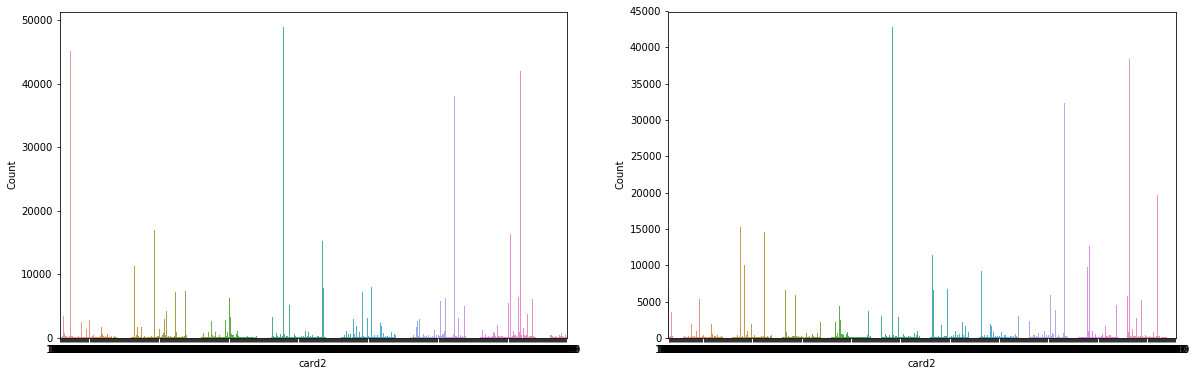

In [ ]:
plt.subplot(1,2,1)
cardTrain = train_transaction_og.groupBy("card2").agg(F.count("card4").alias("Count")).toPandas()
sns.barplot("card2", "Count", data = cardTrain)

plt.subplot(1,2,2)
cardTest = test_transaction_og.groupBy("card2").agg(F.count("card4").alias("Count")).toPandas()
sns.barplot("card2", "Count", data = cardTest)

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


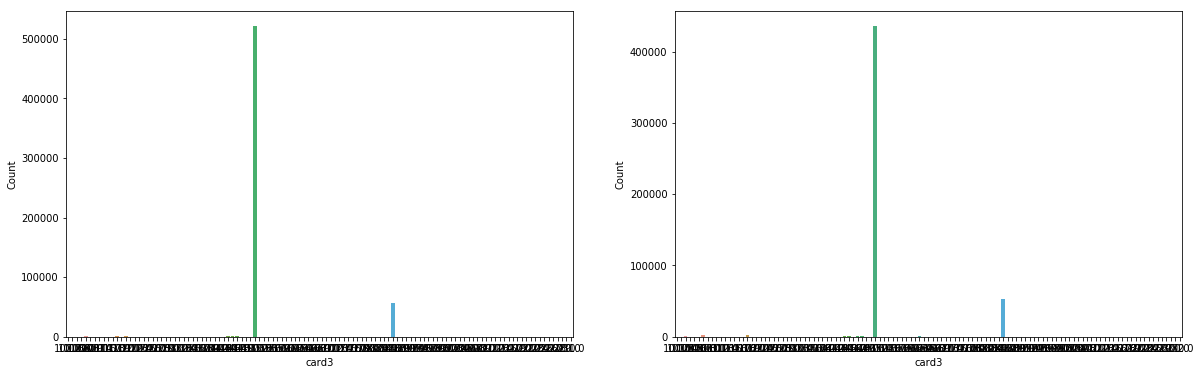

In [ ]:
plt.subplot(1,2,1)
cardTrain = train_transaction_og.groupBy("card3").agg(F.count("card4").alias("Count")).toPandas()
sns.barplot("card3", "Count", data = cardTrain)

plt.subplot(1,2,2)
cardTest = test_transaction_og.groupBy("card3").agg(F.count("card4").alias("Count")).toPandas()
sns.barplot("card3", "Count", data = cardTest)

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


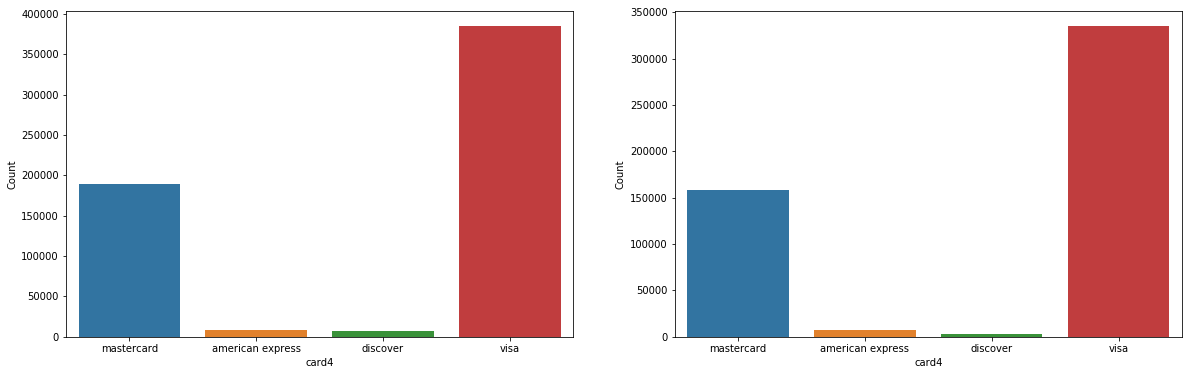

In [ ]:
plt.subplot(1,2,1)
cardTrain = train_transaction_og.groupBy("card4").agg(F.count("card4").alias("Count")).toPandas()
sns.barplot("card4", "Count", data = cardTrain)

plt.subplot(1,2,2)
cardTest = test_transaction_og.groupBy("card4").agg(F.count("card4").alias("Count")).toPandas()
sns.barplot("card4", "Count", data = cardTest)

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


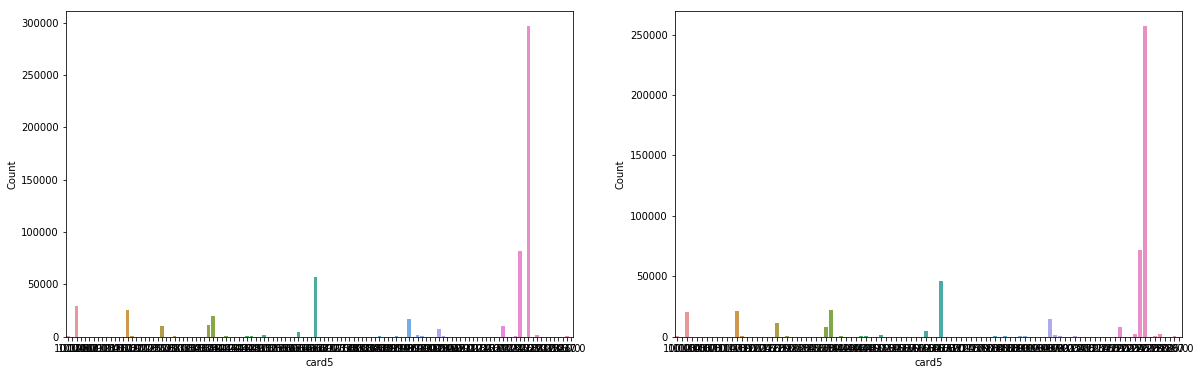

In [ ]:
plt.subplot(1,2,1)
cardTrain = train_transaction_og.groupBy("card5").agg(F.count("card4").alias("Count")).toPandas()
sns.barplot("card5", "Count", data = cardTrain)

plt.subplot(1,2,2)
cardTest = test_transaction_og.groupBy("card5").agg(F.count("card4").alias("Count")).toPandas()
sns.barplot("card5", "Count", data = cardTest)

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


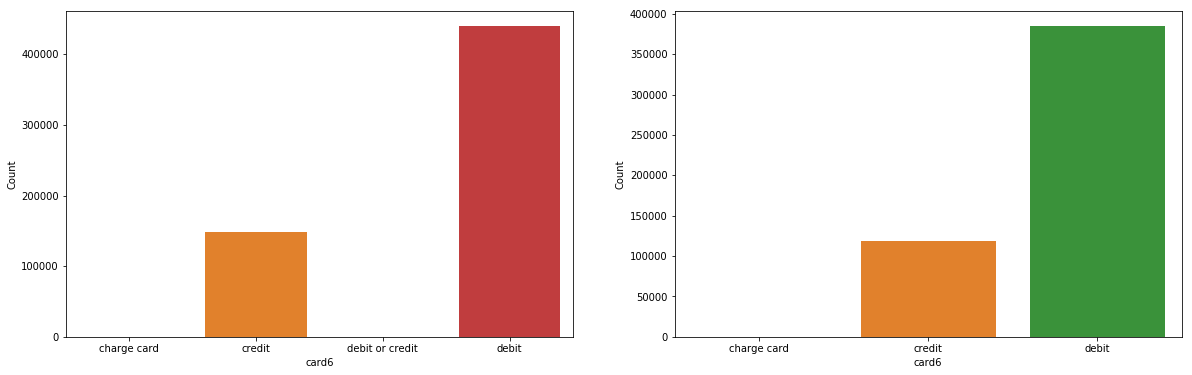

In [ ]:
plt.subplot(1,2,1)
cardTrain = train_transaction_og.groupBy("card6").agg(F.count("card4").alias("Count")).toPandas()
sns.barplot("card6", "Count", data = cardTrain)

plt.subplot(1,2,2)
cardTest = test_transaction_og.groupBy("card6").agg(F.count("card4").alias("Count")).toPandas()
sns.barplot("card6", "Count", data = cardTest)

#### Email Domain - P and R

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


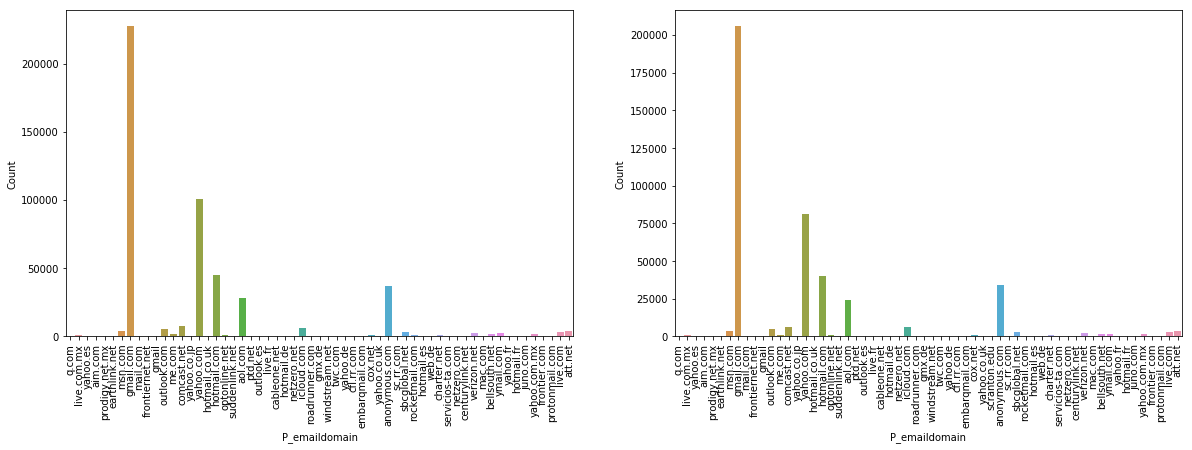

In [ ]:
plt.subplot(1,2,1)
cardTrain = train_transaction_og.groupBy("P_emaildomain").agg(F.count("card4").alias("Count")).toPandas()
sns.barplot("P_emaildomain", "Count", data = cardTrain)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
cardTest = test_transaction_og.groupBy("P_emaildomain").agg(F.count("card4").alias("Count")).toPandas()
sns.barplot("P_emaildomain", "Count", data = cardTest)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


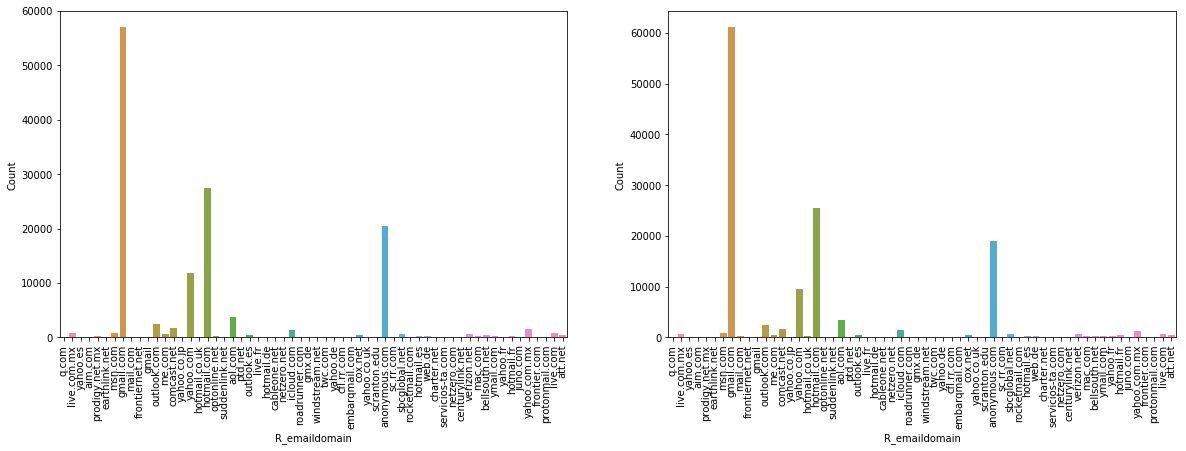

In [ ]:
plt.subplot(1,2,1)
cardTrain = train_transaction_og.groupBy("R_emaildomain").agg(F.count("card4").alias("Count")).toPandas()
sns.barplot("R_emaildomain", "Count", data = cardTrain)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
cardTest = test_transaction_og.groupBy("R_emaildomain").agg(F.count("card4").alias("Count")).toPandas()
sns.barplot("R_emaildomain", "Count", data = cardTest)
plt.xticks(rotation = 90)
plt.show()

#### M1 to M9

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


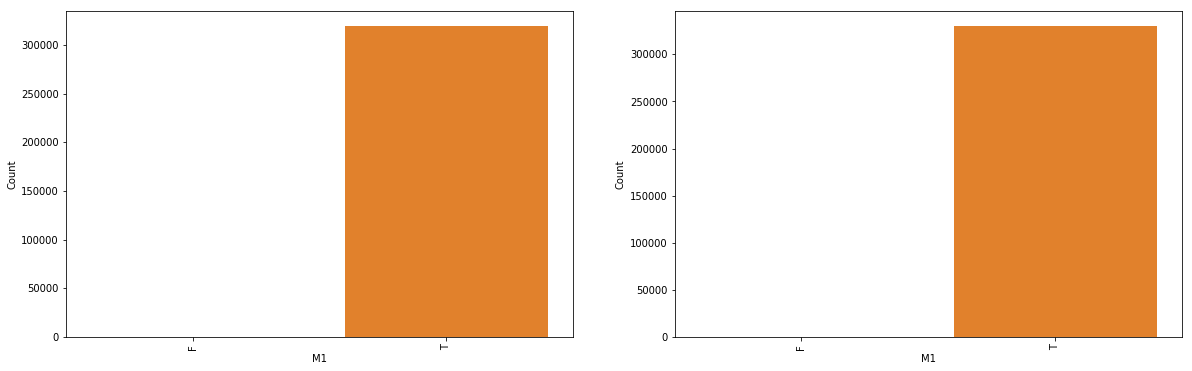

In [ ]:
plt.subplot(1,2,1)
cardTrain = train_transaction_og.groupBy("M1").agg(F.count("M1").alias("Count")).toPandas()
sns.barplot("M1", "Count", data = cardTrain)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
cardTest = test_transaction_og.groupBy("M1").agg(F.count("M1").alias("Count")).toPandas()
sns.barplot("M1", "Count", data = cardTest)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


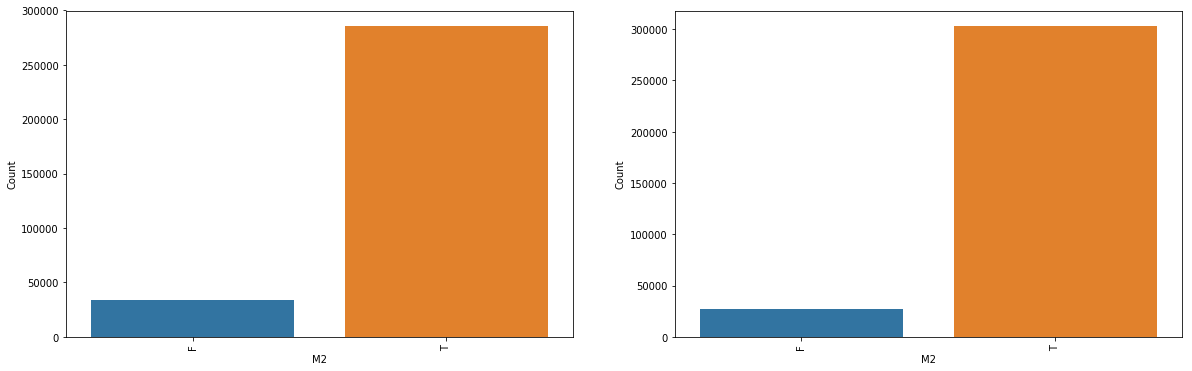

In [ ]:
plt.subplot(1,2,1)
cardTrain = train_transaction_og.groupBy("M2").agg(F.count("M2").alias("Count")).toPandas()
sns.barplot("M2", "Count", data = cardTrain)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
cardTest = test_transaction_og.groupBy("M2").agg(F.count("M2").alias("Count")).toPandas()
sns.barplot("M2", "Count", data = cardTest)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


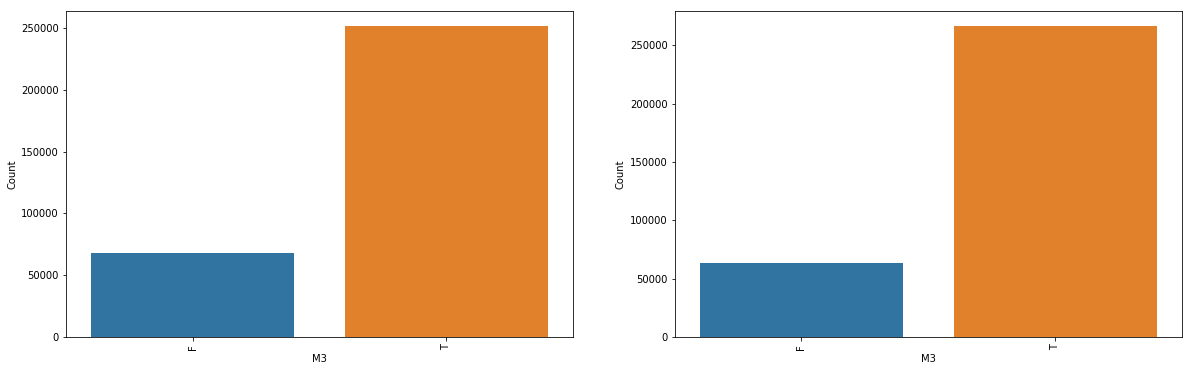

In [ ]:
plt.subplot(1,2,1)
cardTrain = train_transaction_og.groupBy("M3").agg(F.count("M3").alias("Count")).toPandas()
sns.barplot("M3", "Count", data = cardTrain)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
cardTest = test_transaction_og.groupBy("M3").agg(F.count("M3").alias("Count")).toPandas()
sns.barplot("M3", "Count", data = cardTest)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


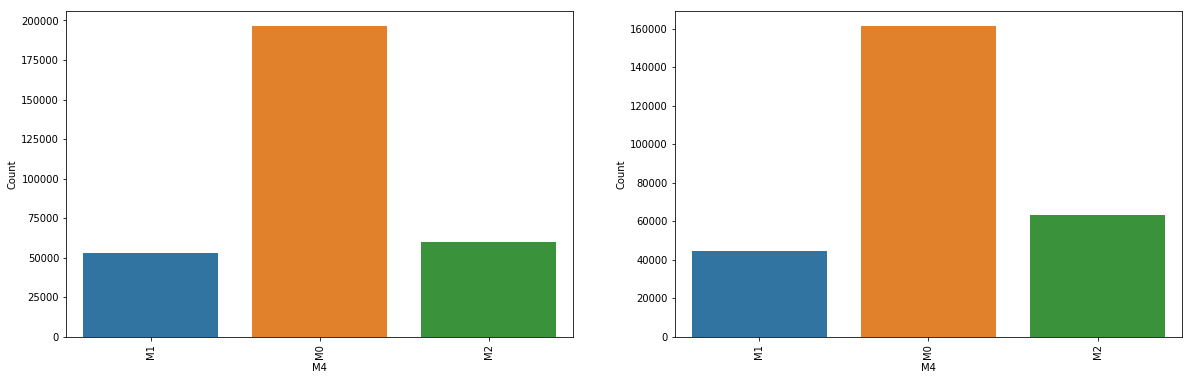

In [ ]:
plt.subplot(1,2,1)
cardTrain = train_transaction_og.groupBy("M4").agg(F.count("M4").alias("Count")).toPandas()
sns.barplot("M4", "Count", data = cardTrain)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
cardTest = test_transaction_og.groupBy("M4").agg(F.count("M4").alias("Count")).toPandas()
sns.barplot("M4", "Count", data = cardTest)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


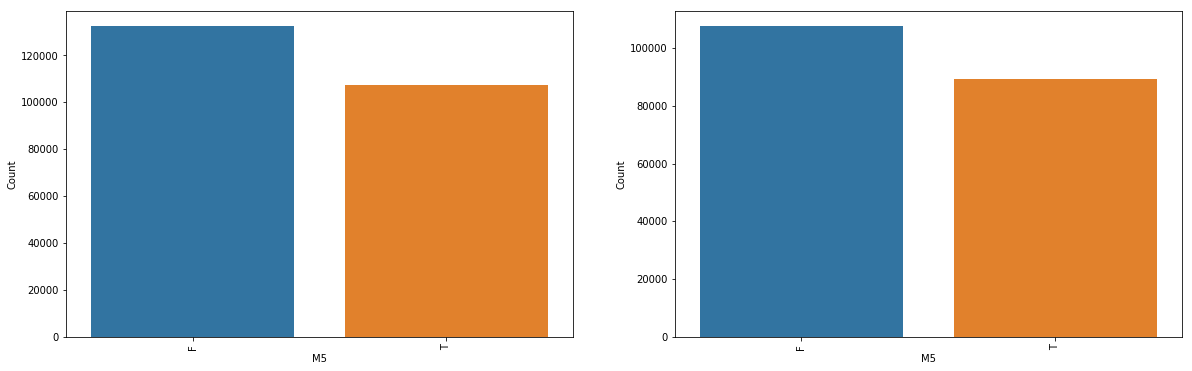

In [ ]:
plt.subplot(1,2,1)
cardTrain = train_transaction_og.groupBy("M5").agg(F.count("M5").alias("Count")).toPandas()
sns.barplot("M5", "Count", data = cardTrain)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
cardTest = test_transaction_og.groupBy("M5").agg(F.count("M5").alias("Count")).toPandas()
sns.barplot("M5", "Count", data = cardTest)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


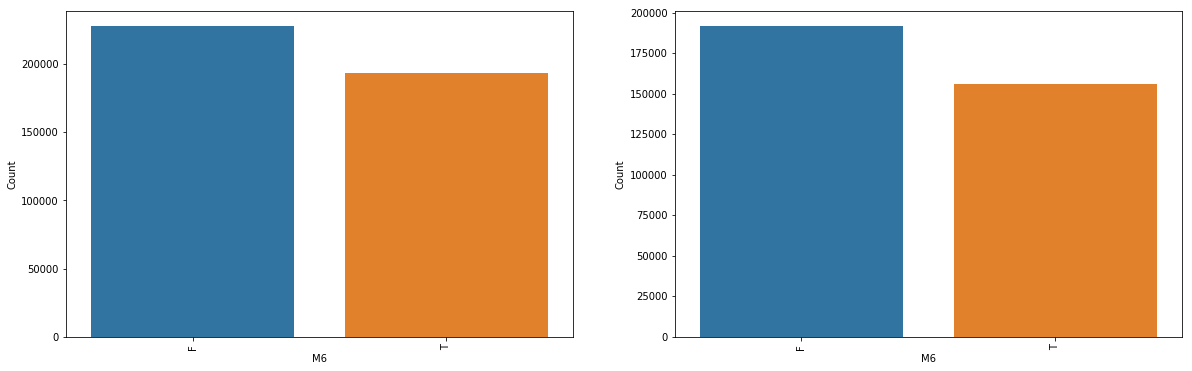

In [ ]:
plt.subplot(1,2,1)
cardTrain = train_transaction_og.groupBy("M6").agg(F.count("M6").alias("Count")).toPandas()
sns.barplot("M6", "Count", data = cardTrain)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
cardTest = test_transaction_og.groupBy("M6").agg(F.count("M6").alias("Count")).toPandas()
sns.barplot("M6", "Count", data = cardTest)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


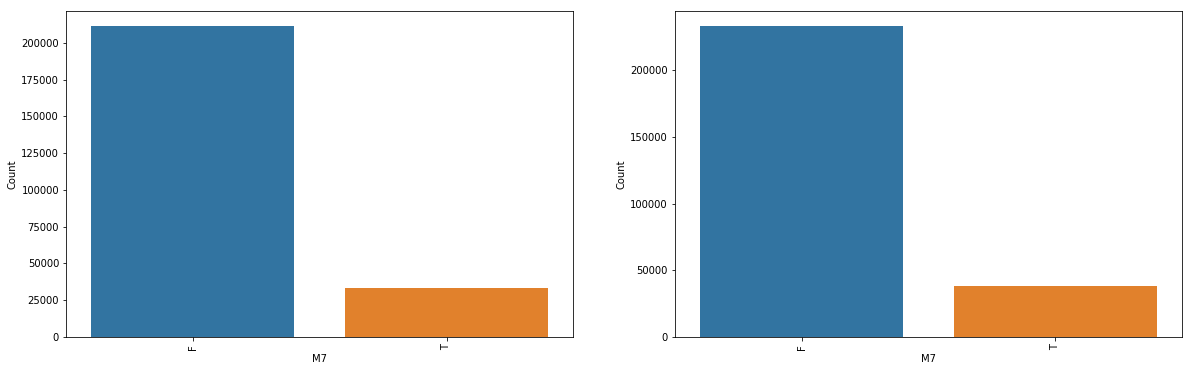

In [ ]:
plt.subplot(1,2,1)
cardTrain = train_transaction_og.groupBy("M7").agg(F.count("M7").alias("Count")).toPandas()
sns.barplot("M7", "Count", data = cardTrain)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
cardTest = test_transaction_og.groupBy("M7").agg(F.count("M7").alias("Count")).toPandas()
sns.barplot("M7", "Count", data = cardTest)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


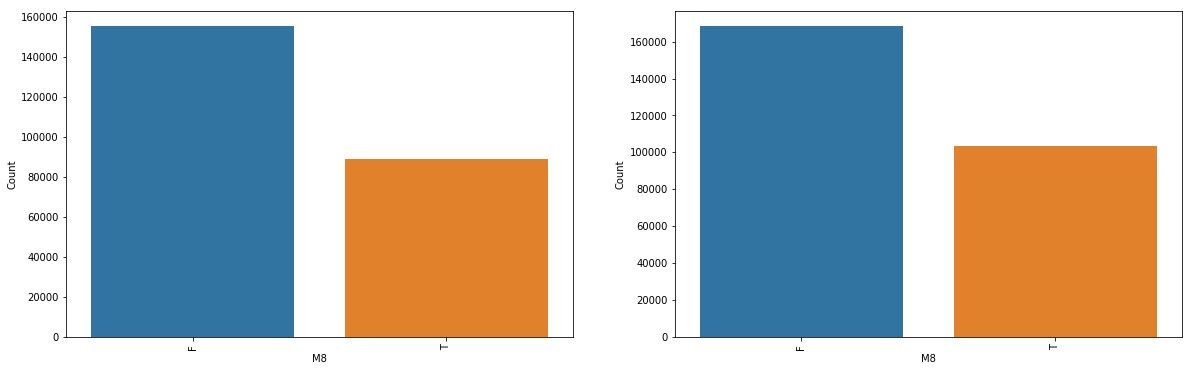

In [ ]:
plt.subplot(1,2,1)
cardTrain = train_transaction_og.groupBy("M8").agg(F.count("M8").alias("Count")).toPandas()
sns.barplot("M8", "Count", data = cardTrain)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
cardTest = test_transaction_og.groupBy("M8").agg(F.count("M8").alias("Count")).toPandas()
sns.barplot("M8", "Count", data = cardTest)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


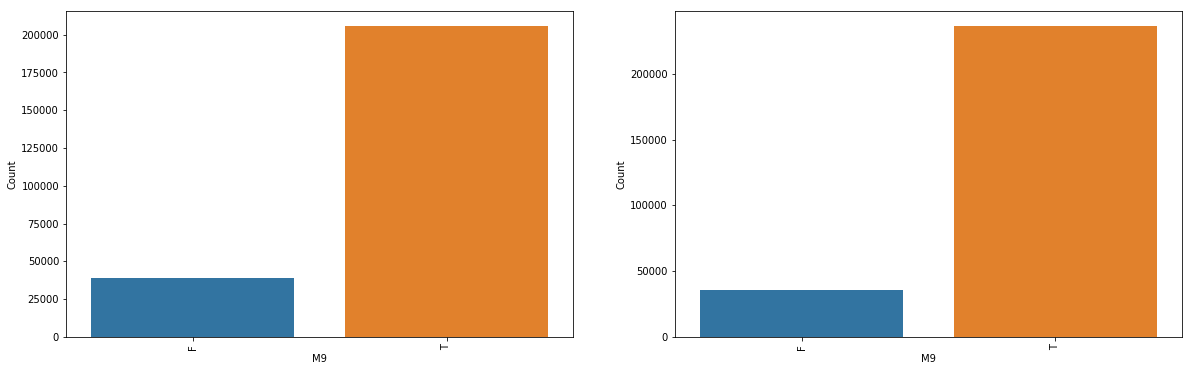

In [ ]:
plt.subplot(1,2,1)
cardTrain = train_transaction_og.groupBy("M9").agg(F.count("M9").alias("Count")).toPandas()
sns.barplot("M9", "Count", data = cardTrain)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
cardTest = test_transaction_og.groupBy("M9").agg(F.count("M9").alias("Count")).toPandas()
sns.barplot("M9", "Count", data = cardTest)
plt.xticks(rotation = 90)
plt.show()

#### Address

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


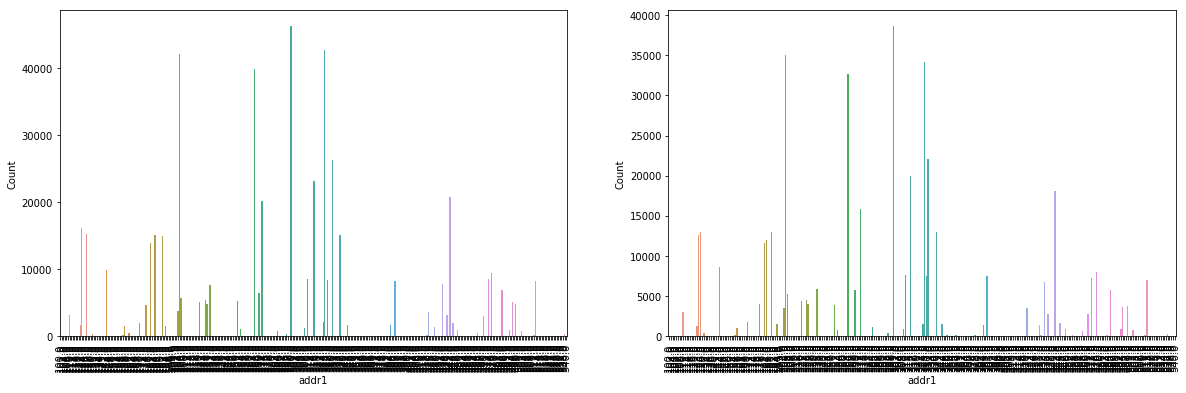

In [ ]:
plt.subplot(1,2,1)
cardTrain = train_transaction_og.groupBy("addr1").agg(F.count("addr1").alias("Count")).toPandas()
sns.barplot("addr1", "Count", data = cardTrain)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
cardTest = test_transaction_og.groupBy("addr1").agg(F.count("addr1").alias("Count")).toPandas()
sns.barplot("addr1", "Count", data = cardTest)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


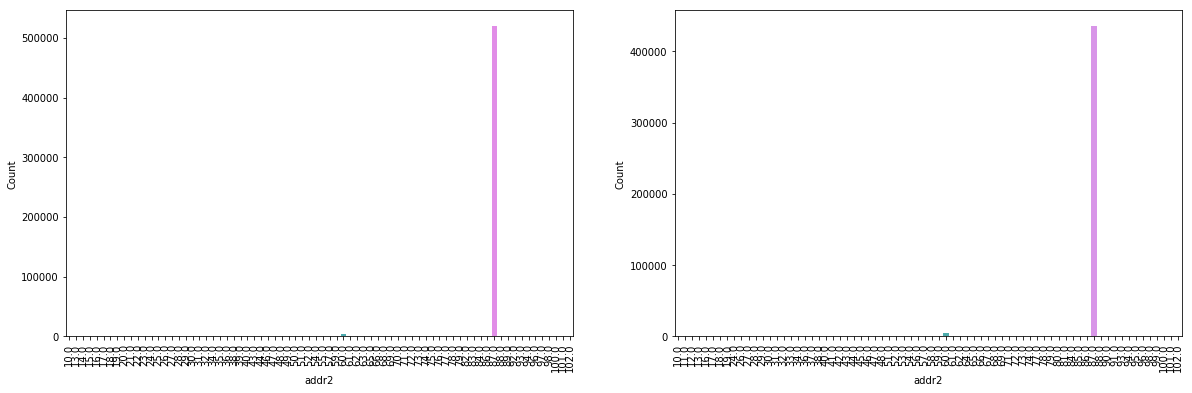

In [ ]:
plt.subplot(1,2,1)
cardTrain = train_transaction_og.groupBy("addr2").agg(F.count("addr2").alias("Count")).toPandas()
sns.barplot("addr2", "Count", data = cardTrain)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
cardTest = test_transaction_og.groupBy("addr2").agg(F.count("addr2").alias("Count")).toPandas()
sns.barplot("addr2", "Count", data = cardTest)
plt.xticks(rotation = 90)
plt.show()

### Next

TransactionDT <- A date column  

**Category Columns**
ProductCD  
emaildomain  
card1 - card6  
addr1, addr2  
P_emaildomain  
R_emaildomain  
M1 - M9  

In [ ]:
train_transaction_og.describe().show()

+-------+----------------+-------------------+-----------------+------------------+---------+-----------------+------------------+------------------+----------------+------------------+---------------+------------------+-----------------+------------------+------------------+-------------+-------------+------------------+------------------+--------------------+-----------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+-------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------+------+------+------+------+------+------+------+------+--------------------+------------------+------------------+------------------+---------

In [ ]:
train_transaction_og.isNull()

#### Time EDA 

Train set is 2nd Jan 1970 to 2nd July 1970.  
Test set is from 2nd Aug 1970 to 31st Jan 1971.  

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


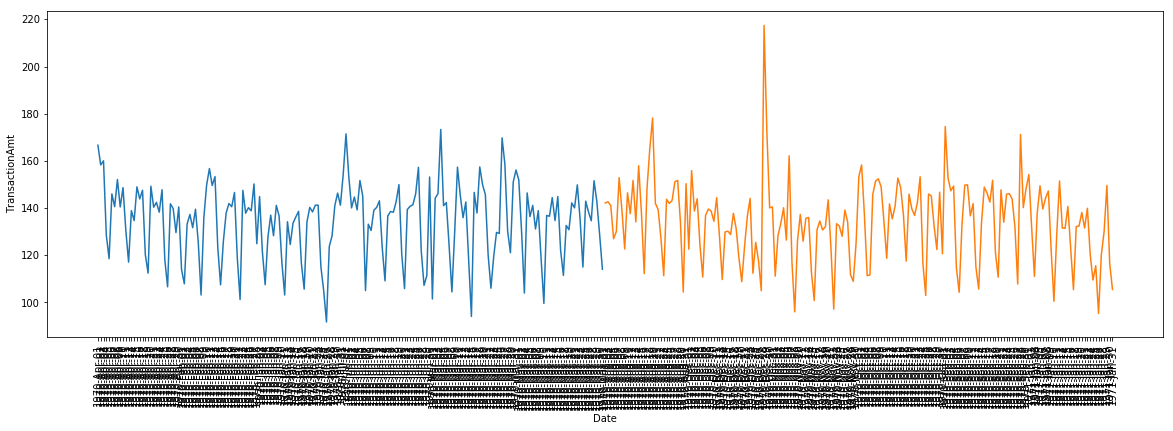

In [ ]:
#plt.subplot(2,1,1)
sns.lineplot("Date", "TransactionAmt", data = train_transaction_og.select(F.date_format("TransactionDT", "yyyy-MMM-dd").alias("Date"), "TransactionAmt").toPandas(), ci = None) 
plt.xticks(rotation = 90)

#plt.subplot(2,1,2)
sns.lineplot("Date", "TransactionAmt", data = test_transaction_og.select(F.date_format("TransactionDT", "yyyy-MMM-dd").alias("Date"), "TransactionAmt").toPandas(), ci = None) 
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Minimum date is 2nd Jan 1970
train_transaction_og.select(F.min("TransactionDT"), F.max("TransactionDT")).show()

+-------------------+-------------------+
| min(TransactionDT)| max(TransactionDT)|
+-------------------+-------------------+
|1970-01-02 00:00:00|1970-07-02 23:58:51|
+-------------------+-------------------+



In [ ]:
test_transaction_og.select(F.min("TransactionDT"), F.max("TransactionDT")).show()

+-------------------+-------------------+
| min(TransactionDT)| max(TransactionDT)|
+-------------------+-------------------+
|1970-08-02 00:00:24|1971-01-31 23:59:05|
+-------------------+-------------------+



/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


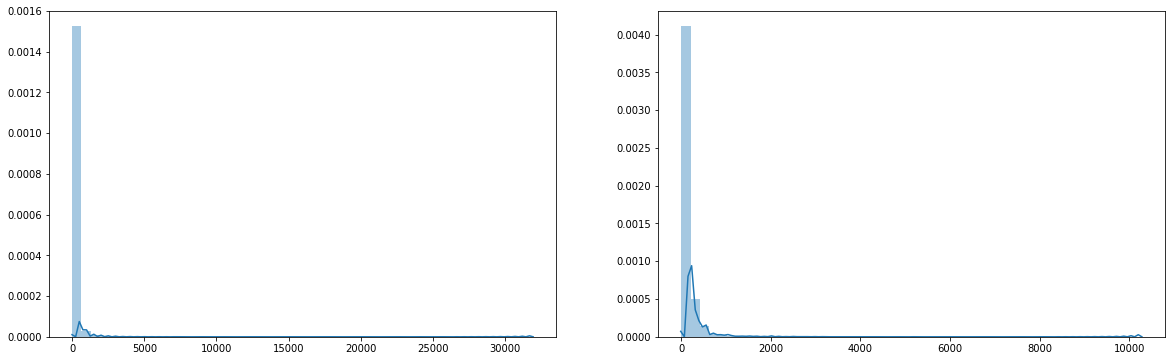

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("TransactionAmt").toPandas()) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("TransactionAmt").toPandas()) 

Column D6, D11, D12,  D14, D15 has negative values.  
D9 are these probabilities?

#### Dist1 and Dist2

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


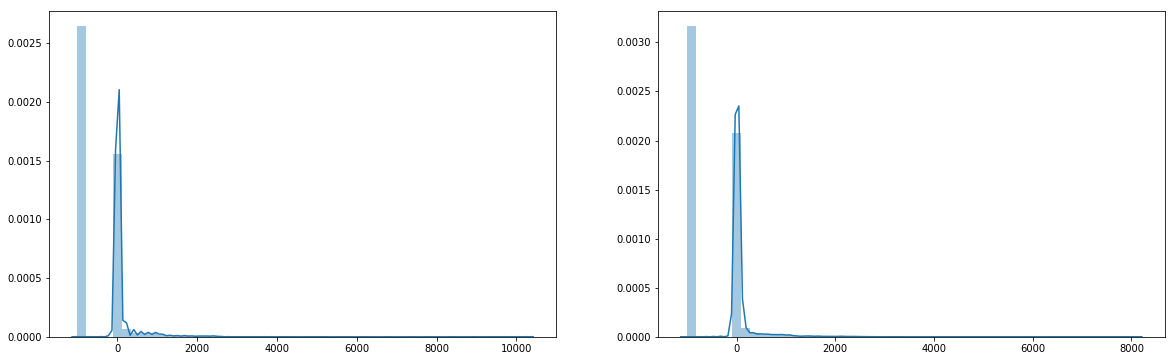

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("dist1").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("dist1").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


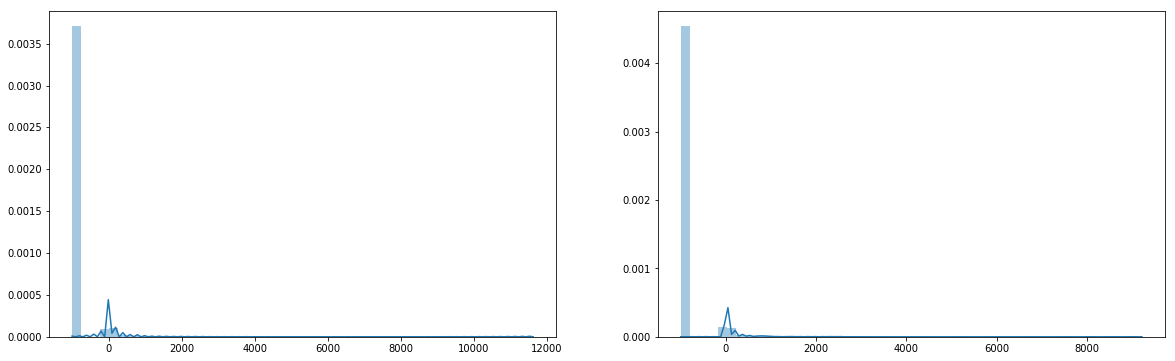

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("dist2").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("dist2").toPandas().fillna(-999)) 

#### C1 - C14

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


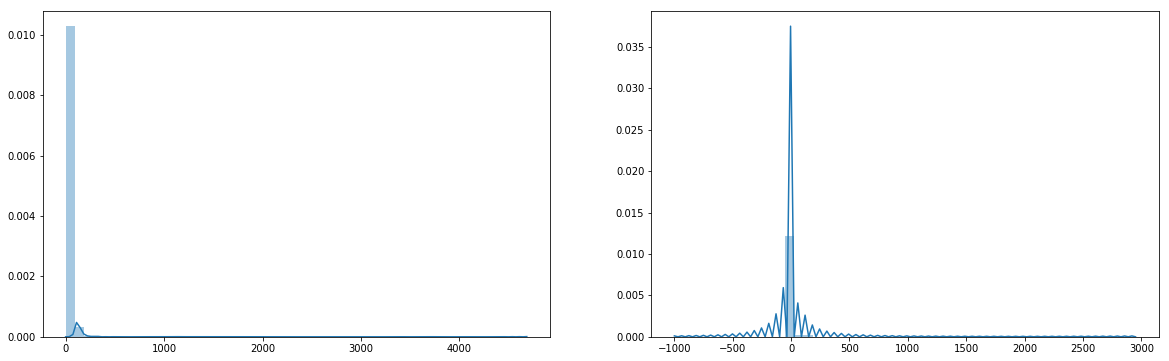

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("C1").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("C1").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


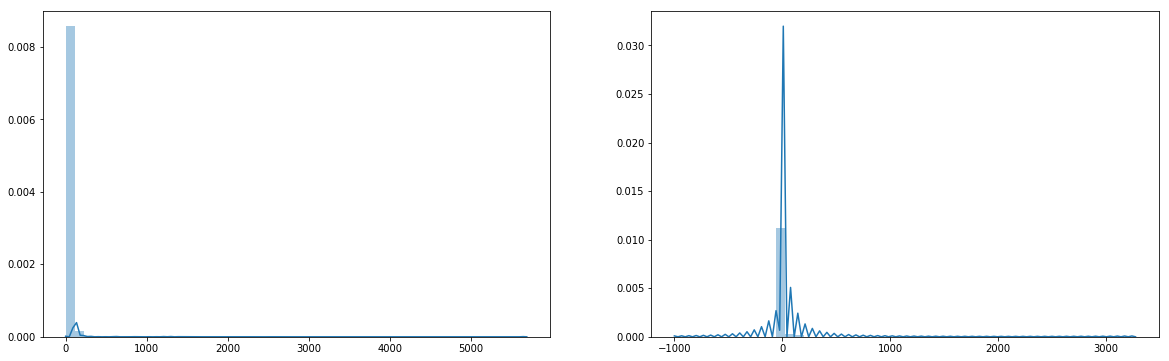

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("C2").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("C2").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


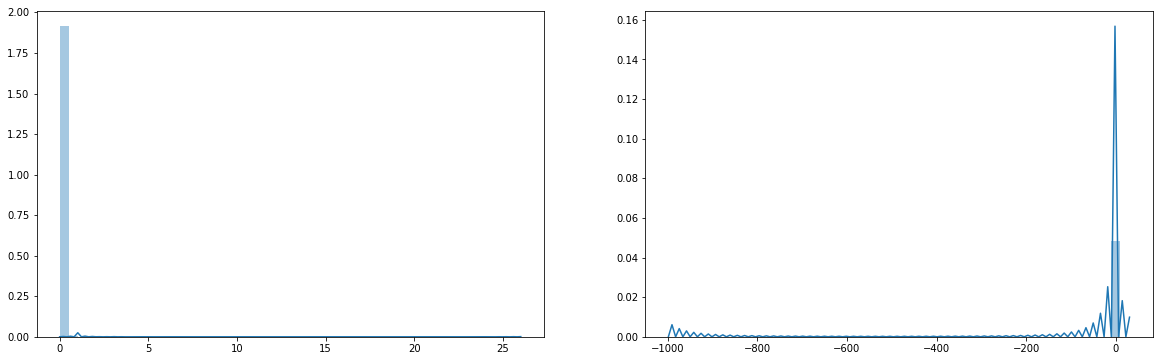

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("C3").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("C3").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


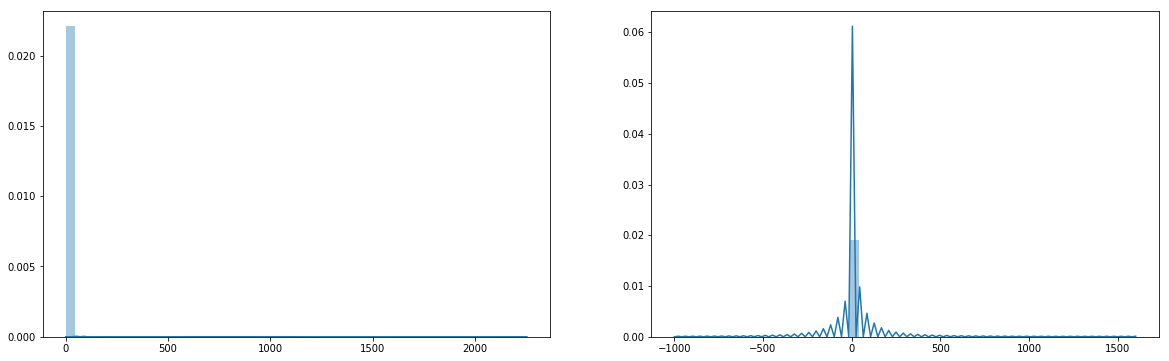

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("C4").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("C4").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


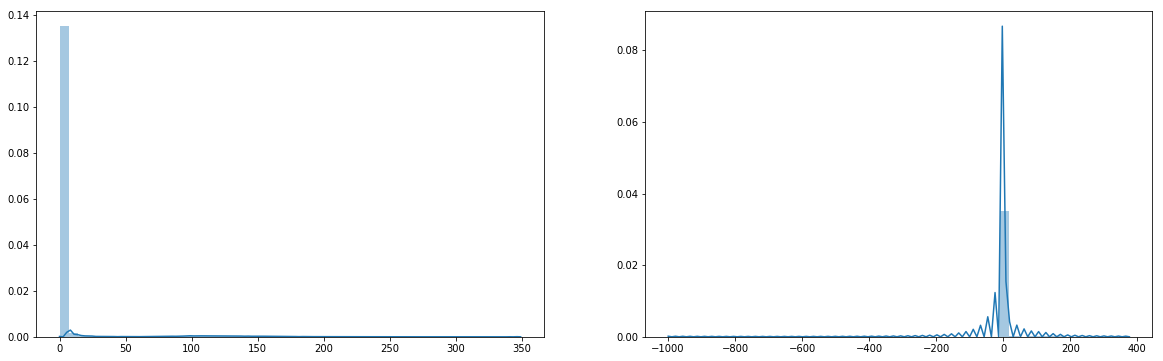

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("C5").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("C5").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


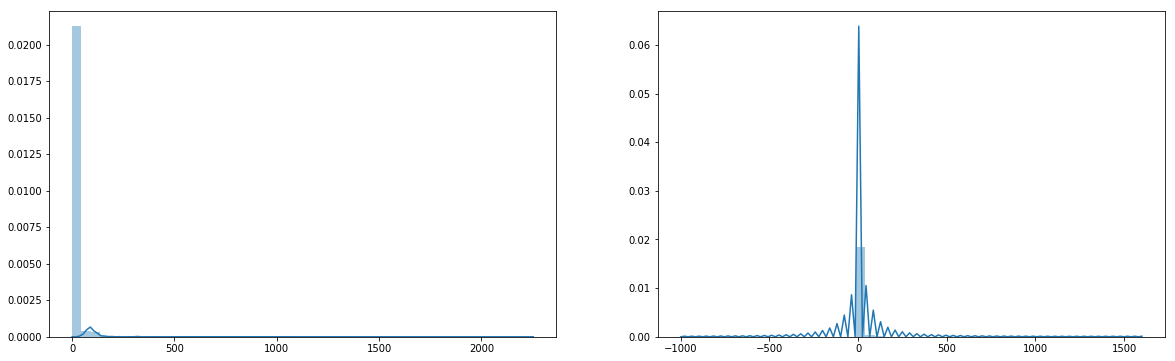

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("C6").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("C6").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


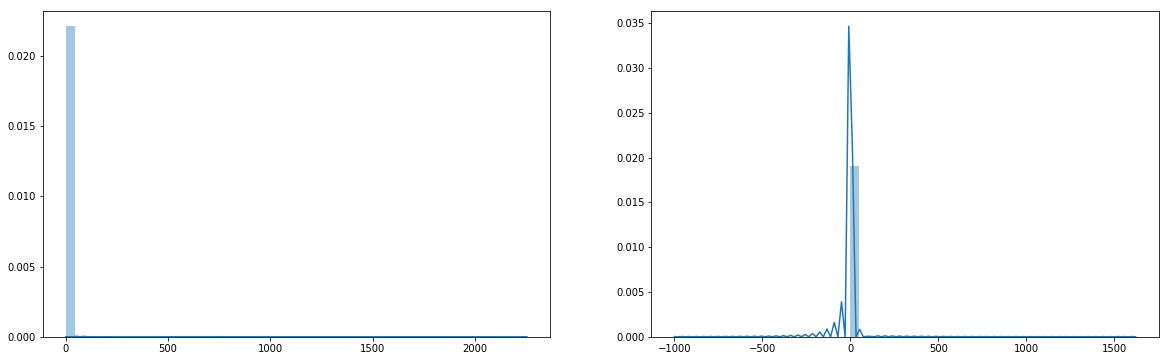

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("C7").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("C7").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


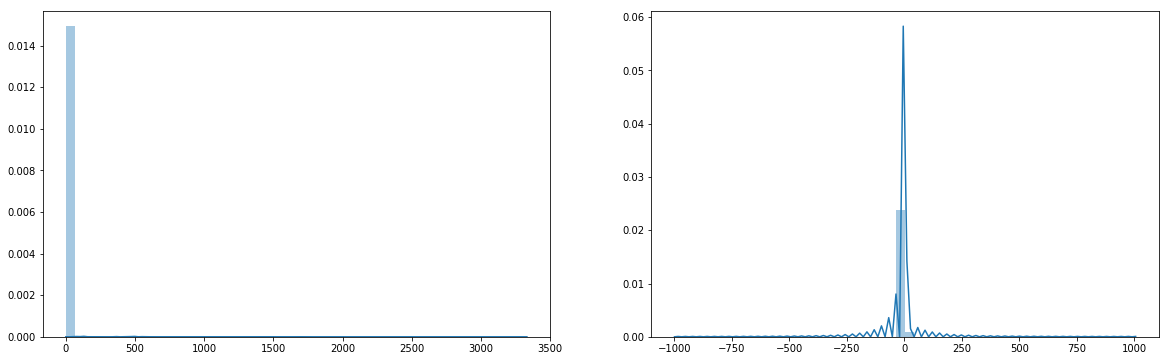

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("C8").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("C8").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


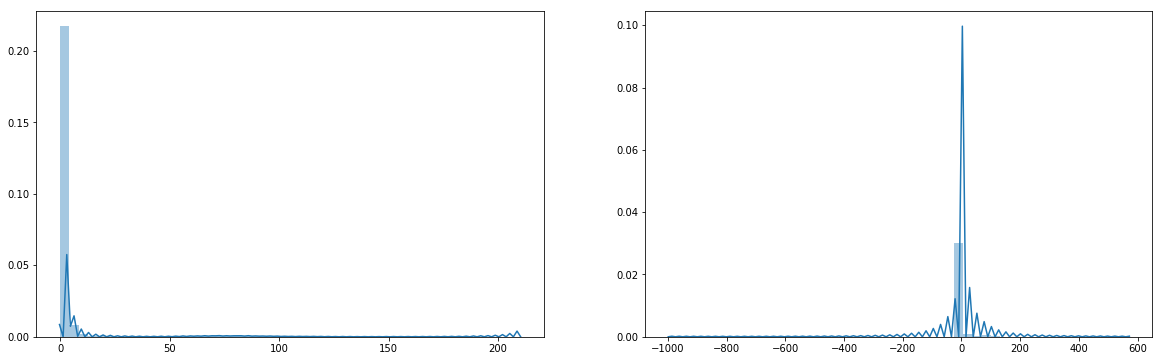

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("C9").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("C9").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


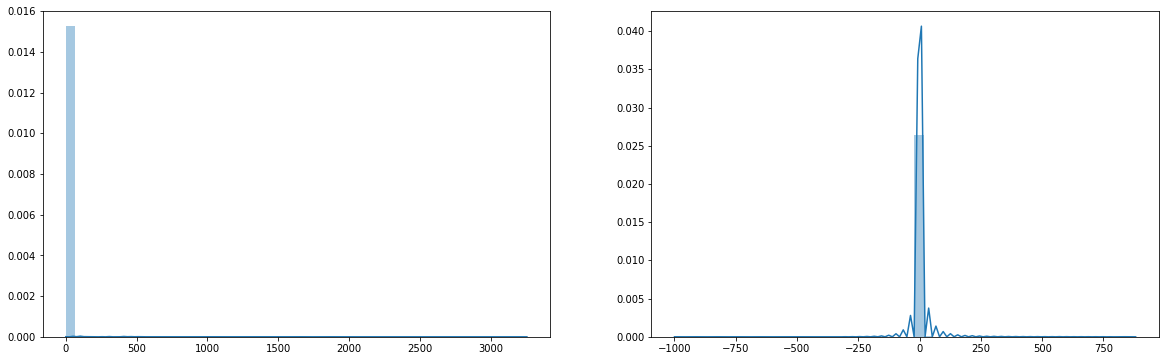

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("C10").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("C10").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


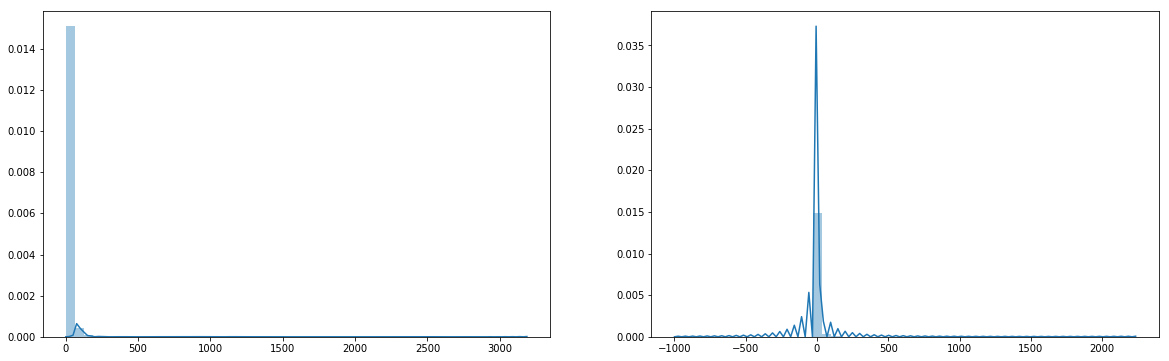

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("C11").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("C11").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


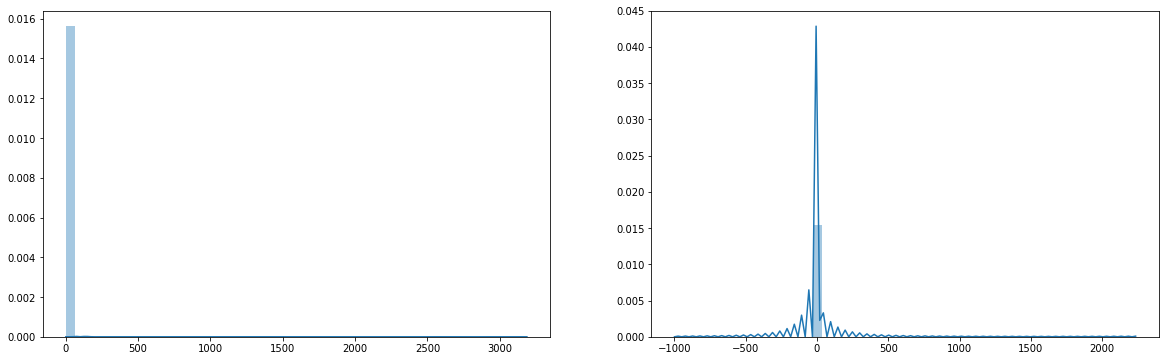

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("C12").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("C12").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


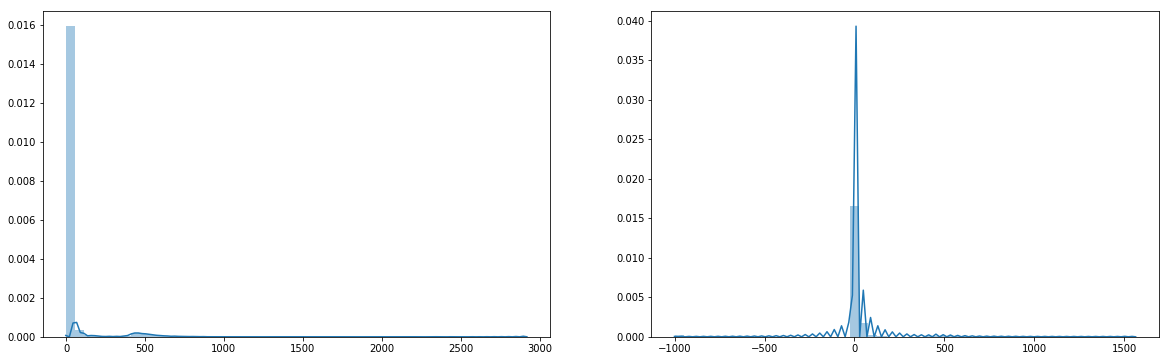

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("C13").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("C13").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


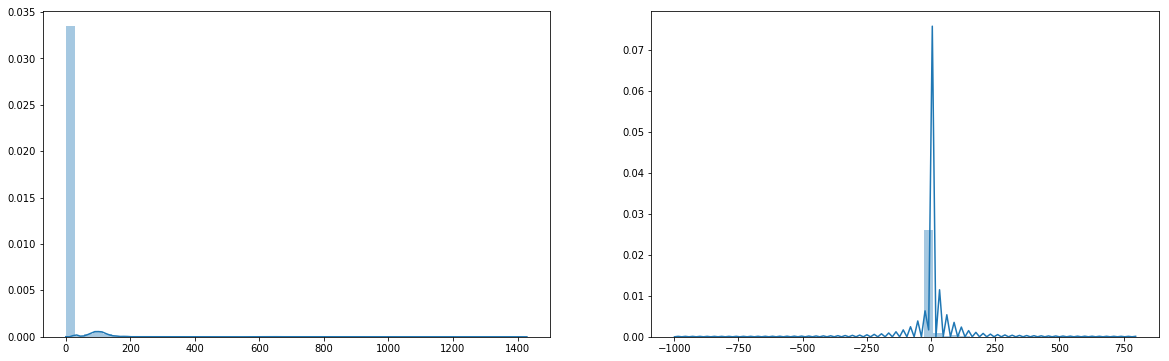

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("C14").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("C14").toPandas().fillna(-999)) 

#### D1 - D15

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


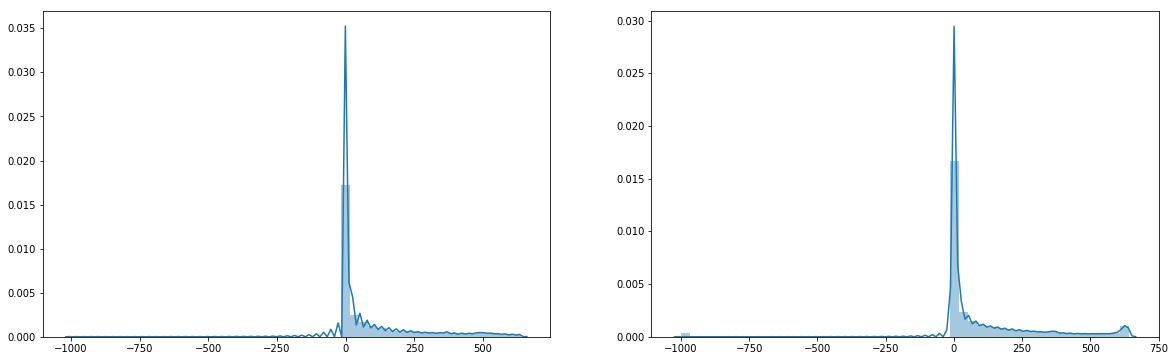

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("D1").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("D1").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


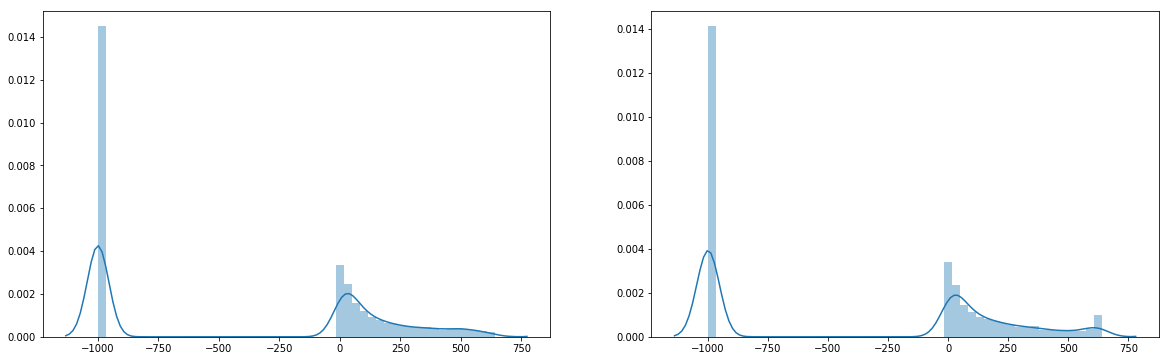

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("D2").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("D2").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


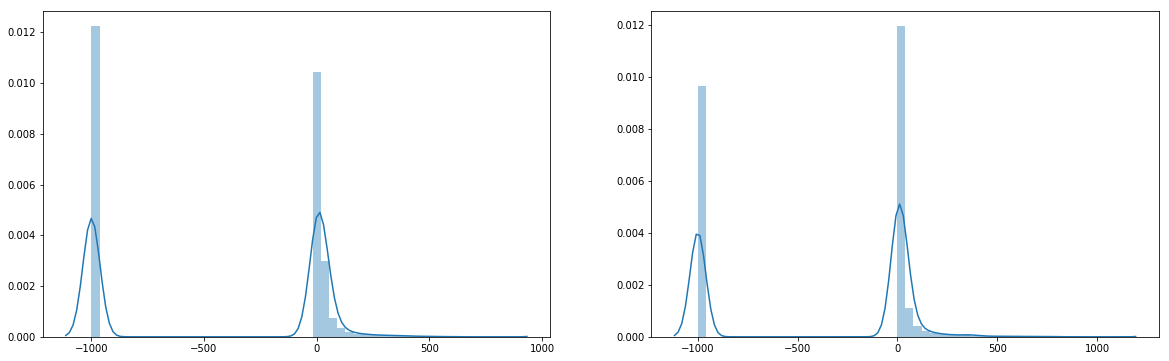

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("D3").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("D3").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


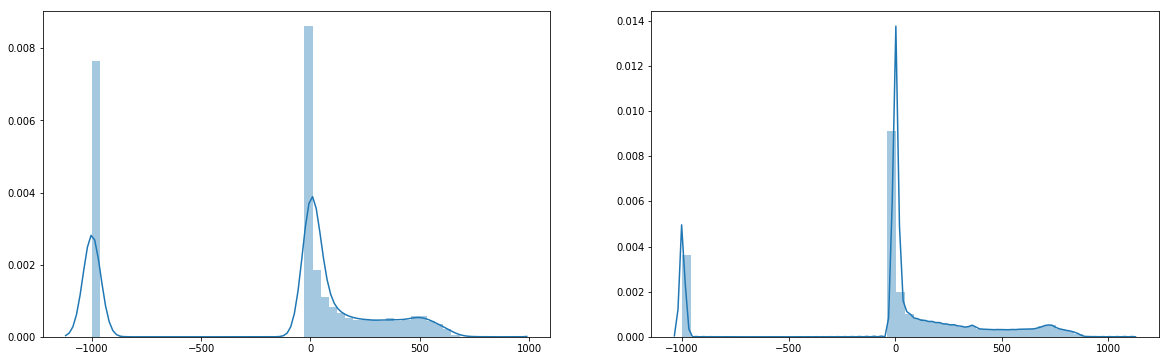

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("D4").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("D4").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


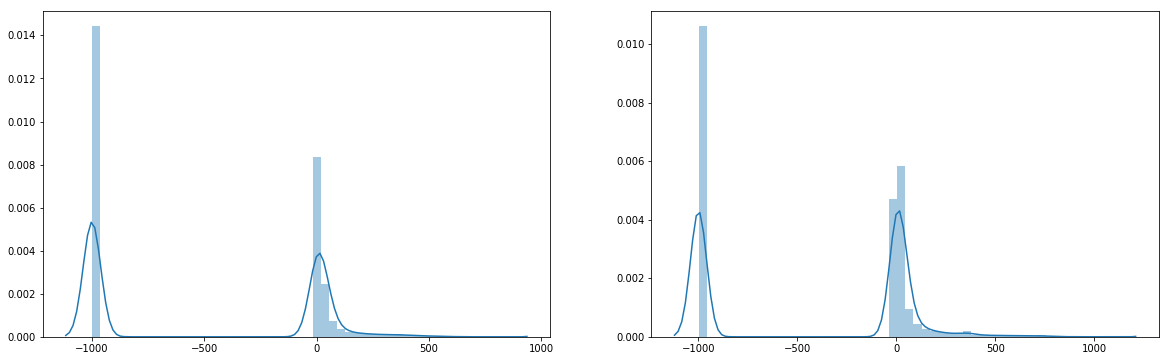

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("D5").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("D5").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


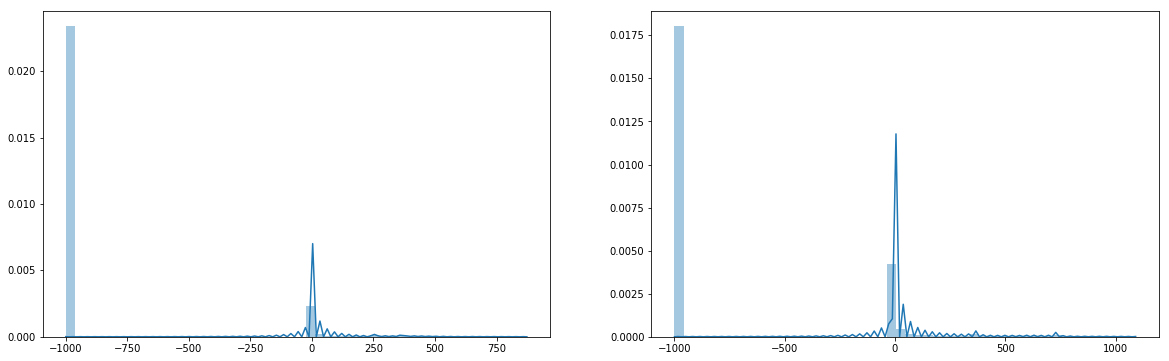

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("D6").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("D6").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


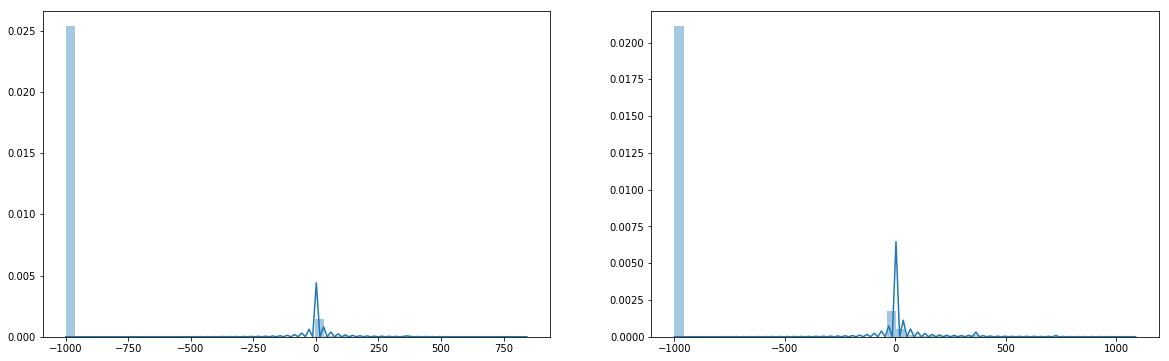

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("D7").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("D7").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


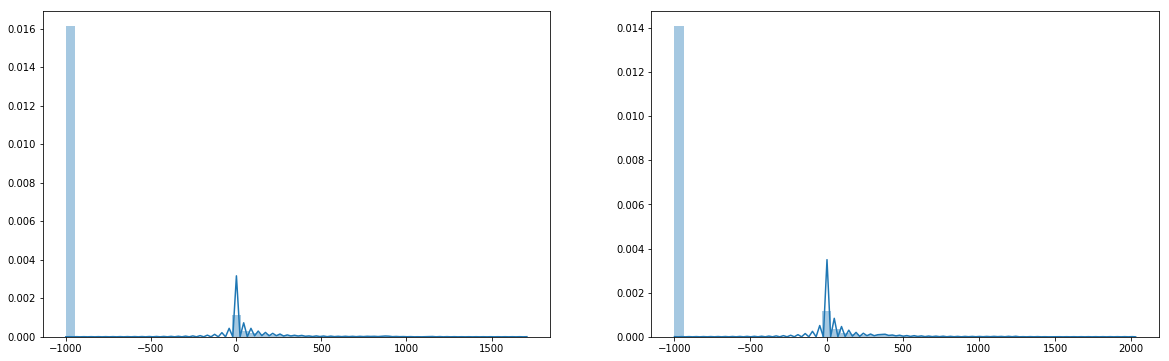

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("D8").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("D8").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


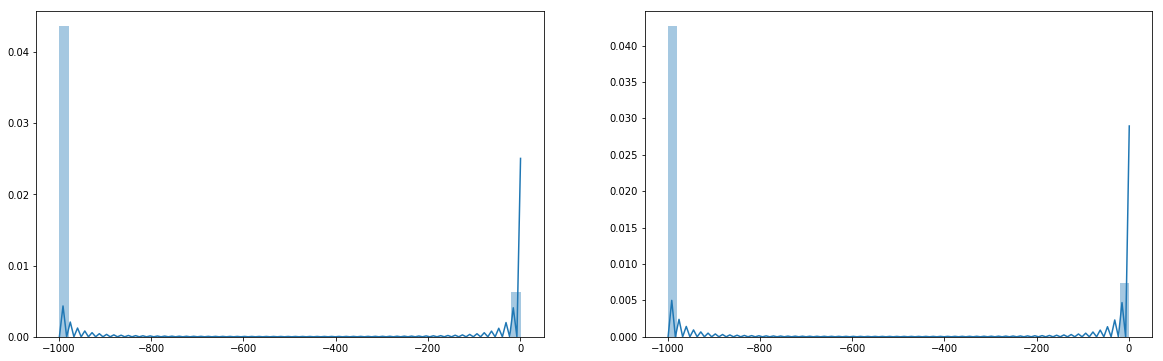

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("D9").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("D9").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


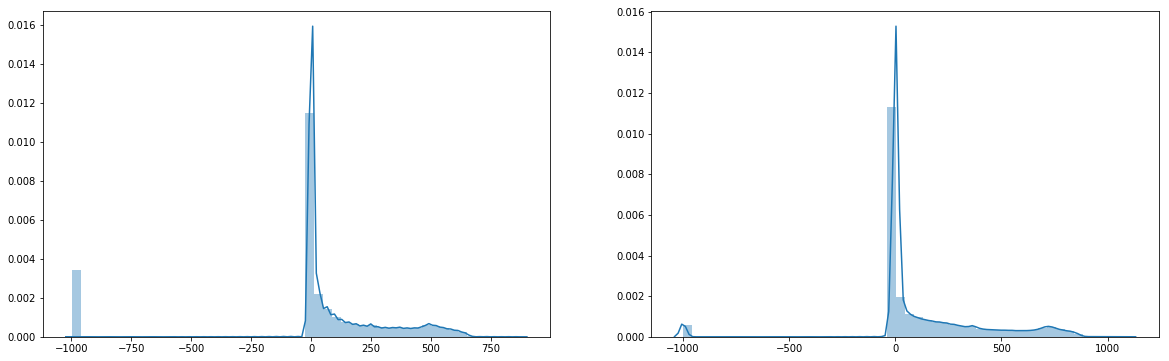

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("D10").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("D10").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


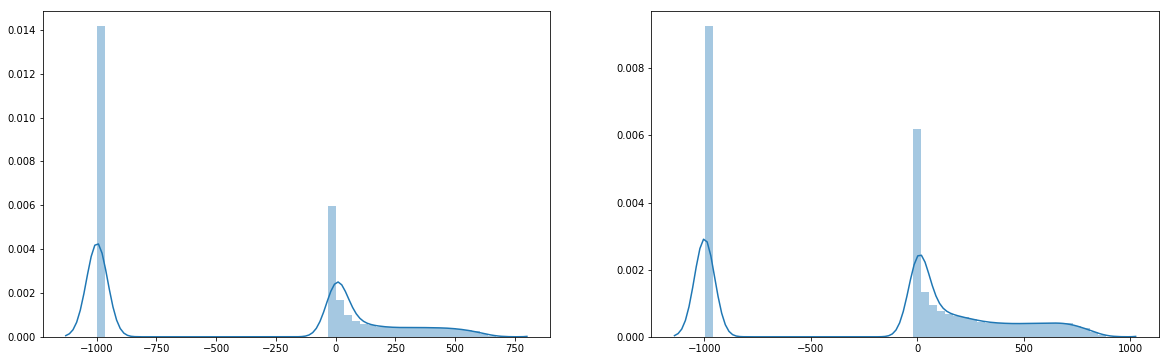

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("D11").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("D11").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


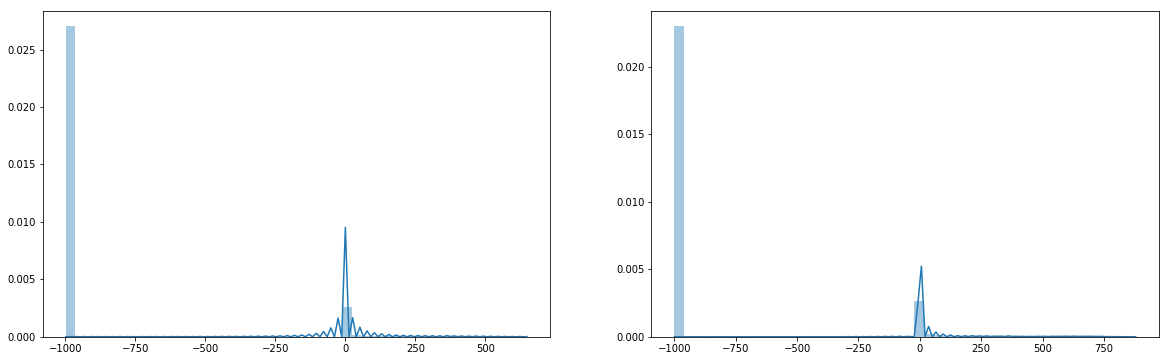

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("D12").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("D12").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


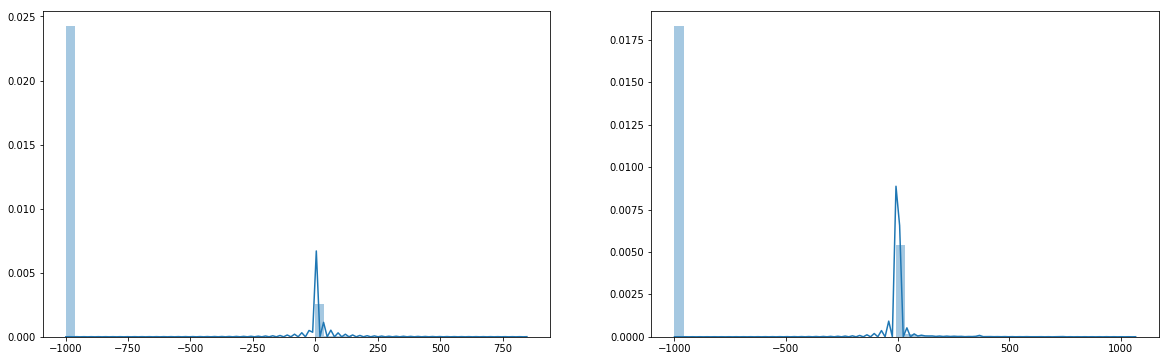

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("D13").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("D13").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


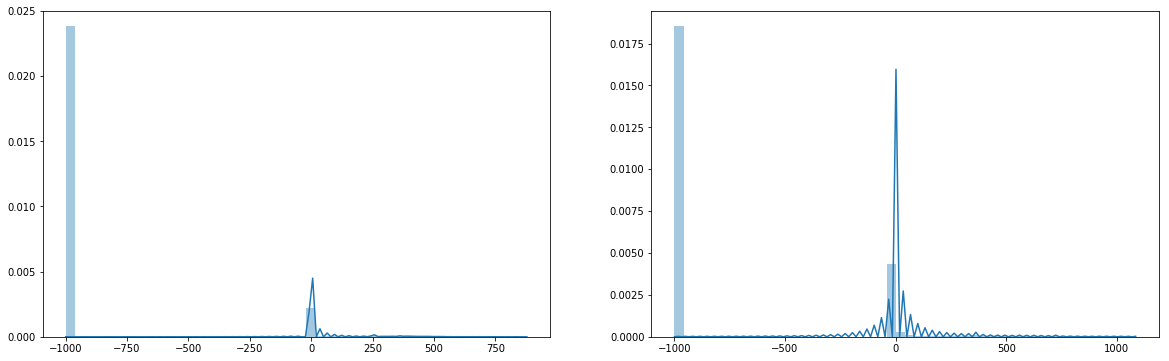

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("D14").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("D14").toPandas().fillna(-999)) 

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


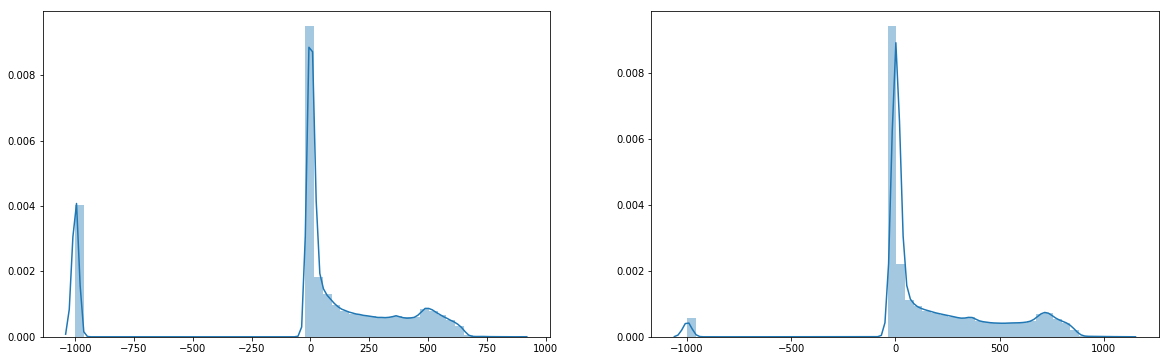

In [ ]:
plt.subplot(1,2,1)
sns.distplot(train_transaction_og.select("D15").toPandas().fillna(-999)) 

plt.subplot(1,2,2)
sns.distplot(test_transaction_og.select("D15").toPandas().fillna(-999)) 

#### V1 - V339

## JOIN

In [ ]:
train_data = train_transaction_og.join(train_identity_og, on = "TransactionID", how = "left").drop("TransactionID")
#train_data.show(5)

## Validation Split

https://docs.databricks.com/_static/notebooks/binary-classification.html

NA should not be there

In [ ]:
(trainingData, testData) = transformed.randomSplit([0.6, 0.4])

# splits = train_data.randomSplit([0.7, 0.3])
# train_df = splits[0]
# test_df = splits[1]

In [ ]:
# from pyspark.ml.feature import VectorAssembler, OneHotEncoderEstimator, StringIndexer

# # Use a for loop with StringIndexer

# stringer = StringIndexer(inputCol="ProductCD", outputCol="ProductCDa")
# stringerone = StringIndexer(inputCol="card1", outputCol="card1a")
# stringertwo = StringIndexer(inputCol="card2", outputCol="card2a")
# stringerthree = StringIndexer(inputCol="card3", outputCol="card3a")
# stringerfour = StringIndexer(inputCol="card4", outputCol="card4a")
# #stringerfour = StringIndexer(inputCol="card4", outputCol="card4a")
# #stringerfour = StringIndexer(inputCol="card4", outputCol="card4a")

# onehot = OneHotEncoderEstimator(inputCols=["ProductCDa", "card1a", "card2a", "card3a", "card4a"], outputCols=["ProductCDb", "card1b", "card2b", "card3b", "card4b"])

# out = stringer.fit(train_data).transform(train_data)
# out = stringerone.fit(out).transform(out)
# out = stringertwo.fit(out).transform(out)
# out = stringerthree.fit(out).transform(out)
# out = stringerfour.fit(out).transform(out)
# out = onehot.fit(out).transform(out)

# #out.show(5)


https://stackoverflow.com/questions/37270446/how-to-roll-a-custom-estimator-in-pyspark-mllib

In [ ]:
from pyspark.ml.feature import VectorAssembler, OneHotEncoderEstimator, StringIndexer

out = train_data
stringefeatures = ["ProductCD", "card1", "card2", "card3", "card4", "card5", "card6", "addr1", "addr2", "P_emaildomain", "R_emaildomain", 
                   "M1", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9", "DeviceType", "DeviceInfo",
                  "id_12", "id_13", "id_14", "id_15", "id_16", "id_17", "id_18", "id_19", "id_20", "id_21", "id_22", "id_23", "id_24", "id_25", "id_26", "id_27", "id_28",
                   "id_29", "id_30", "id_31", "id_32", "id_33", "id_34", "id_35", "id_36", "id_37", "id_38"]

for col in stringefeatures :
    stringer = StringIndexer(inputCol=col, outputCol=col + "a", ).setHandleInvalid("keep")
    out = stringer.fit(out).transform(out).drop(col)
    
#out.show(5)

In [ ]:
ohe = OneHotEncoderEstimator(inputCols=[string + "a" for string in stringefeatures], outputCols=[string + "b" for string in stringefeatures])
out2 = ohe.fit(out).transform(out).drop(*[string + "a" for string in stringefeatures])

labelstring = StringIndexer(inputCol = "isFraud", outputCol = "target")
out2 = labelstring.fit(out2).transform(out2).drop("isFraud")
out2 = out2.fillna(0)
#out2.show(5)

In [ ]:
out2 = out2.drop("TransactionDT")

assembler = VectorAssembler(inputCols=out2.drop("target").columns, outputCol="features").setHandleInvalid("keep")
out3 = assembler.transform(out2).select("target", "features")

#out3.show(5)

In [ ]:
from pyspark.ml.classification import LogisticRegression

# Create initial LogisticRegression model
lr = LogisticRegression(labelCol="target", featuresCol="features", maxIter=10)

# Train model with Training Data
lrModel = lr.fit(out3)

In [ ]:
predictions = lrModel.transform(out3.drop("isFraud"))

predictions.show(5)

+------+--------------------+--------------------+--------------------+----------+
|target|            features|       rawPrediction|         probability|prediction|
+------+--------------------+--------------------+--------------------+----------+
|   0.0|(19590,[0,3,4,6,8...|[5.00525872245171...|[0.99334201882234...|       0.0|
|   0.0|(19590,[0,1,3,4,7...|[4.05235593778734...|[0.98291557392732...|       0.0|
|   0.0|(19590,[0,3,4,8,1...|[3.73596198779978...|[0.97670536565804...|       0.0|
|   0.0|(19590,[0,3,4,8,1...|[1.92105027076441...|[0.87225550674184...|       0.0|
|   0.0|(19590,[0,3,4,7,8...|[4.66879595235924...|[0.99070367168131...|       0.0|
+------+--------------------+--------------------+--------------------+----------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol = "target", metric = "areaUnderROC")
print(evaluator.evaluate(predictions)) # Default AUC

evaluator.setMetricName("areaUnderPR")
# evaluator.setMetricName("accuracy")
# evaluator.getMetricName() # <- This is ROC

'areaUnderROC'

In [ ]:
evaluator.evaluate(predictions)

0.8735682129866965

In [ ]:
from sklearn.metrics import confusion_matrix

y_true = predictions.select("target").toPandas()
y_pred = predictions.select("prediction").toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred)
cnf_matrix

array([[562453,   7424],
       [ 20391,    272]])

## RandomForest

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline

from pyspark.ml.feature import DecisionTreeParams, Imputer, OneHotEncoderEstimator, StringIndexer, VectorAssembler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [ ]:
rf = RandomForestClassifier(labelCol="target", featuresCol="features")
rfModel = rf.fit(out3)
predictions = rfModel.transform(out3.drop("isFraud"))
predictions.show(5)

+------+--------------------+--------------------+--------------------+----------+
|target|            features|       rawPrediction|         probability|prediction|
+------+--------------------+--------------------+--------------------+----------+
|   0.0|(19590,[0,3,4,6,8...|[19.4795411877116...|[0.97397705938558...|       0.0|
|   0.0|(19590,[0,1,3,4,7...|[19.5831935475151...|[0.97915967737575...|       0.0|
|   0.0|(19590,[0,3,4,8,1...|[19.4182584231952...|[0.97091292115976...|       0.0|
|   0.0|(19590,[0,3,4,8,1...|[19.3560949106445...|[0.96780474553222...|       0.0|
|   0.0|(19590,[0,3,4,7,8...|[19.6123214653091...|[0.98061607326545...|       0.0|
+------+--------------------+--------------------+--------------------+----------+
only showing top 5 rows



In [ ]:
BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='target', metricName='areaUnderROC').evaluate(predictions)

0.8227206247781809

In [ ]:
from sklearn.metrics import confusion_matrix

rfPred = predictions.select("target", "prediction").toPandas()
confusion_matrix(rfPred.target, rfPred.prediction)

/usr/local/lib/python3.6/dist-packages/pyarrow/__init__.py:152: UserWarning: pyarrow.open_stream is deprecated, please use pyarrow.ipc.open_stream
  warnings.warn("pyarrow.open_stream is deprecated, please use "


array([[569796,     81],
       [ 19216,   1447]])

## XGBoost 

Needs H2O sparkling  
https://runawayhorse001.github.io/LearningApacheSpark/classification.html#xgboost-gradient-boosted-tree-classification